*** United States Honey production 1998-2012 ***

To get some unguided practice on linear regression I am going to analyze the US Honey production 1998-2012 dataset downloaded from Kaggle

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Import the csv file into the honey DataFrame and take a look at head() describe() and info()

In [3]:
honey = pd.read_csv('honeyproduction.csv')
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
state          626 non-null object
numcol         626 non-null float64
yieldpercol    626 non-null int64
totalprod      626 non-null float64
stocks         626 non-null float64
priceperlb     626 non-null float64
prodvalue      626 non-null float64
year           626 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


Put nicer names for the columns.

In [5]:
col_names = ['State',
             'Number of Colonies',
             'Yield per Colony (lbs)',
             'Total Production (lbs)',
             'Stocks held on Dec 15th (lbs)',
             'Price per lb ($)',
             'Production Value ($)',
             'Year']

In [6]:
honey.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


The dataset looks tidy and "easy to use". In particular:
* There are no NaNs
* All the data is numeric except the STATE

Let's take a look at the seaborn pariplot and a heatmap to see if there are easy to spot correlations.

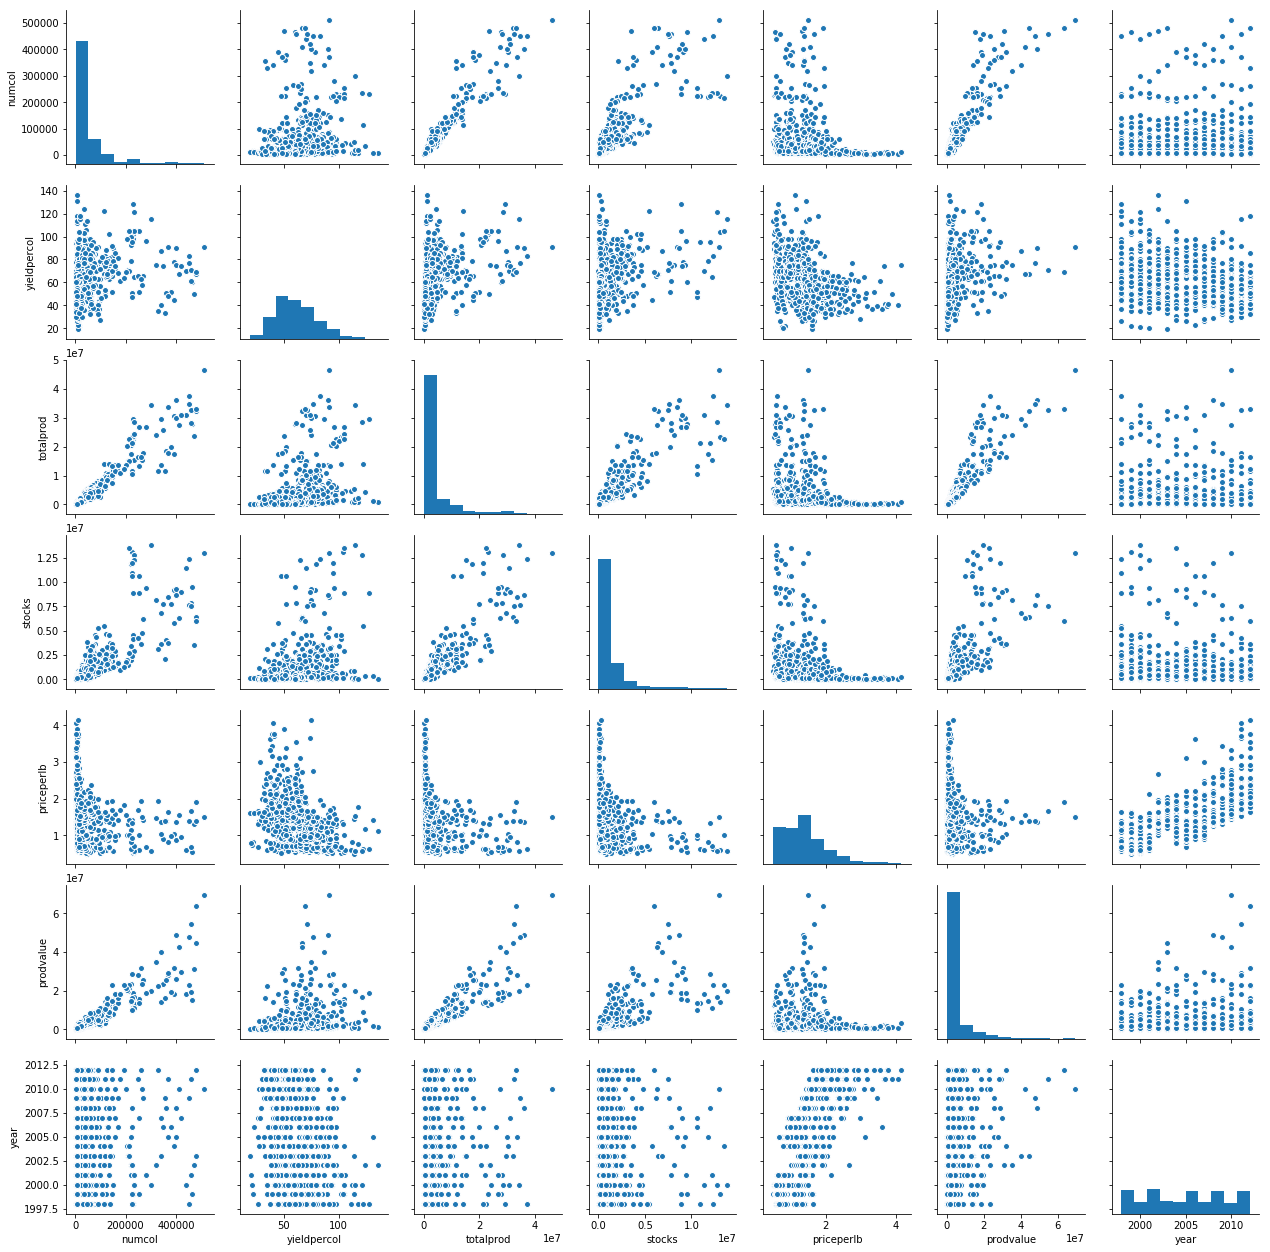

In [7]:
pp = sns.pairplot(honey)    

**Graph 1 - Pairplot for the honey DataFrame.**

>We can see some clear correlations as well as a time trend.
    

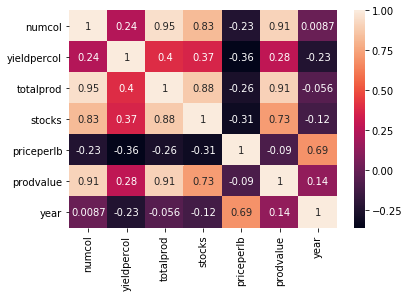

In [8]:
sns.heatmap(honey.corr(), annot = True)

**Graph 2 - Annotated heatmap for the honey dataset.**

>The strong correlation between *Production Value* and *Number of Colonies* and *Total Production* is due to the definitions:
1. *Production Value* = *Total Production* X *Price per lb*
2. *Total Production* = *Number of Colonies* X *Yield per Colony*    

Let's plot the evolution of total Us Honey production from 1998 to 2012.  
To do this we want to group the data by year summing all states.

In [9]:
byYear = honey.groupby(by = 'year').sum()

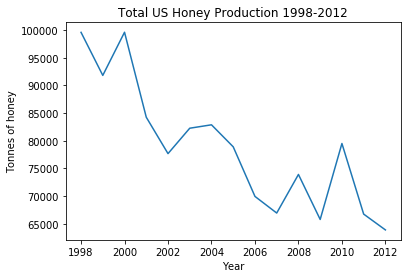

In [10]:
plt.plot(byYear.index ,byYear['totalprod']*0.000453592)
plt.title('Total US Honey Production 1998-2012')
plt.ylabel('Tonnes of honey')
plt.xlabel('Year')
plt.show()

**Graph 3 - Total US Honey Production 1998-2012.**

>We can see there has been a rather steady decline in total honey production over this period.  
Total production is given by *Number of Colonies* X *Yield per Colony*. 

Let's look at how these have evolved over time for the whole USA.

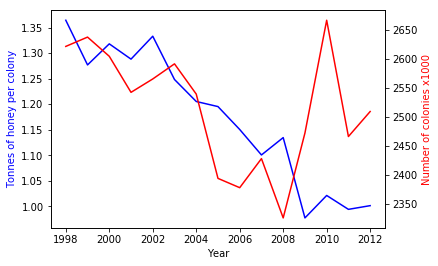

In [11]:
# I need an axes object to clone with twinx()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel('Year')

# Prepare the first line on the first axis
ax1.plot(byYear.index,
         byYear['yieldpercol'] * 0.000453592,
         color = 'blue')
# Set the left y-axis label
ax1.set_ylabel('Tonnes of honey per colony')
ax1.yaxis.label.set_color('blue')

# Prepare the second line on the second axis
ax2.plot(byYear.index,
         byYear['numcol'] / 1000,
         color = 'red')
# Set the right y-axis label
ax2.set_ylabel('Number of colonies x1000')
ax2.yaxis.label.set_color('red')
plt.show()

**Graph 4 - Evolution over time of *Number of Colonies* and *Honey production per Colony* **

From this graph we cannot directly attribute the decline in honey production to a single one of the two factors since both have declined steadily.

We can see there has been an effort to increase the bee population between 2008-2010 but this hasn't had a lasting effect.

Let's now have a look at the evolution of the average price per lb of honey across the US during the period of interest.

In [12]:
byYear = honey.groupby(by = 'year').mean()

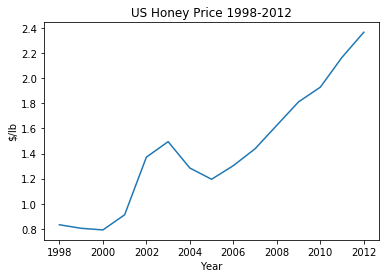

In [13]:
plt.plot(byYear.index ,byYear['priceperlb'])
plt.title('US Honey Price 1998-2012')
plt.ylabel('$/lb')
plt.xlabel('Year')
plt.show()

**Graph 5 - Evolution over time of *Honey Price per lb* in the US**

The price of honey across the US has been increasing steadily except in the period 2003-2005 where it dropped. From Graph 1 we can see that there has been an increase in production in the same period.

I will therefore now build a linear model to predict honey price based on the dataset with all states aggregated for total US data.

In [14]:
byYear.columns

Index(['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue'],
      dtype='object')

In [15]:
# Create a new DataFrame for ease of use
byYearSum = honey.groupby(by = 'year').sum()
byYearMean = honey.groupby(by = 'year').mean()
usHon = pd.DataFrame(data = byYearSum[['numcol', 
                                       'yieldpercol', 
                                       'totalprod',
                                       'stocks',
                                       'priceperlb',
                                       'prodvalue']],
                     index = byYearSum.index,
                     columns = byYearSum.columns)
usHon['priceperlb'] = byYearMean['priceperlb']

In [30]:
# Separate features from values and split data into train an test
X = usHon[['numcol', 
           'yieldpercol', 
           'totalprod',
           'stocks',
           'prodvalue']]
y = usHon['priceperlb']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [31]:
# Create the sklearn.linear_model.LinearRegression object
lm = LinearRegression()

In [32]:
# Fit the regressor to the training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# Make predictions for the test data
y_pred = lm.predict(X_test)

Let's calculate some statistics to see how the model does.

In [34]:
MAE = (1 / y_pred.size) * np.sum(np.abs(y_pred - y_test))
MSE = (1 / y_pred.size) * np.sum((y_pred - y_test)**2)
RMSE = np.sqrt(MSE)
print('MAE = {}'.format(MAE))
print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(RMSE))

MAE = 0.07383228254710417
MSE = 0.008899929382596752
RMSE = 0.09433943704833495


These numbers seem very small, let's calculate them again using the sklearn metrics.

In [35]:
metrics.mean_absolute_error(y_true = y_test,
                            y_pred = y_pred)

0.07383228254710417

In [36]:
metrics.mean_squared_error(y_true = y_test,
                           y_pred = y_pred)

0.008899929382596752

The results are identical. Let's make predictions on the whole dataset.

In [37]:
y_pred = lm.predict(X)

In [38]:
MAE = (1 / y_pred.size) * np.sum(np.abs(y_pred - y))
MSE = (1 / y_pred.size) * np.sum((y_pred - y)**2)
RMSE = np.sqrt(MSE)
print('MAE = {}'.format(MAE))
print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(RMSE))

MAE = 0.06780970520051136
MSE = 0.006414640777840525
RMSE = 0.08009145258915289


Naturally the statistics are smaller but now, with a few datapoints we can look at the distribution of the residuals.

d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



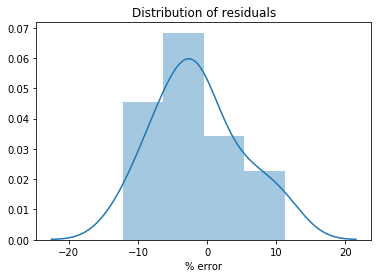

In [39]:
residuals = 100*(y - y_pred)/y
sns.distplot(residuals)
plt.xlabel('% error')
plt.title('Distribution of residuals')
plt.show()

With so few datapoints it is hard to make much sense out of this distribution except for the fact that the error is rather small ±10%.

*** Choropleth ***

I would now like to see if the decline in *Number of Colonies* and in *Yield per Colony* is generalized across the US or localized to a particular area.

In [40]:
# Imports for choropleth maps
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [41]:
init_notebook_mode(connected=True) 

I would like to plot the percentage change in Number of colonies from 1998-2012 for every state in the USA.  
Unfortunately not all states have data for both years.
Let's drop the states that don't have info available and plot the rest.

In [42]:
pct = pd.DataFrame()

h1 = honey
h1 = h1[(h1['year'] == 1998)]
pct['start'] = h1.groupby(by = 'state').mean()['numcol']

h2 = honey
h2 = h2[(h2['year'] == 2012)]
pct['stop'] = h2.groupby(by = 'state').mean()['numcol']

pct['pct_change'] = 100 * (pct['stop'] - pct['start']) / pct['start']
pct = pct.dropna(axis = 0)

In [43]:
# Prepare the dictionaries to pass to the plotly.graph_objs.Figure() function
data = dict(
        type = 'choropleth',
        colorscale = 'Portland',
        locations = pct.index,
        locationmode = 'USA-states',
        z = pct['pct_change'],
        colorbar = {'title' : '%'},
      ) 
layout = dict(
    title = '% change in number of colonies \'98 to \'12',
    geo = dict(
        showframe = False,
        projection = {'type':'albers usa'},
        scope='usa',
        showlakes = True,
        lakecolor = 'rgb(128, 128, 255)'
    )
)
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

***Figure 1 - % change in number of colonies across the U.S.A. from 1998 to 2012.***

> States in white have no data.   
The number of colonies has dropped across most states, the worst drop in Montana that lost almost 70% of its bee colonies.   
A few states go against the trend, in particular:
* North Dakota more than doubled its colonies
* Kentucky and North Carolina increased by > 60%